In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.lib.stride_tricks import sliding_window_view

In [48]:
df = pd.read_json("../reports/emb_prio.jsonl", lines=True, orient="records")

In [49]:
df_weighted = df[df["embedding_type"] == "lookup_weighted_concat"]
weight_means = []
weight_stds = []

for i in range(4):
    weights = np.stack(df_weighted[f"embedding_weight_{i}"])
    weight_means.append(np.mean(weights, axis=0))
    weight_stds.append(np.std(weights, axis=0))
  
weight_means = np.array(weight_means)
weight_stds = np.array(weight_stds)

In [61]:
labels = df.iloc[0]['labels']
label_windows = sliding_window_view(labels, 1000)
n_unique_windows = np.array([len(np.unique(window)) for window in label_windows])

/tmp/ipykernel_2688795/888158500.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc=1, borderaxespad=1., frameon=False)


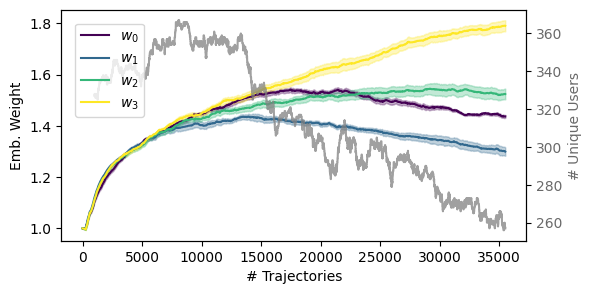

In [115]:
weight_means_p = weight_means[:, ::2]
weight_stds_p = weight_stds[:, ::2]
fig, ax1 = plt.subplots(1, 1, figsize=(6, 3))
cmap = plt.get_cmap("viridis", 4)
colors = cmap(range(4))
for i in range(4):
    x = np.arange(0, len(weight_means_p[i]), step=1)
    line =ax1.plot(x, weight_means_p[i], label=rf"$w_{i}$", color=colors[i])
    ax1.fill_between(
        x,
        weight_means_p[i] - weight_stds_p[i],
        weight_means_p[i] + weight_stds_p[i],
        alpha=0.3,
        color=colors[i],
    )

ax2 = ax1.twinx()
x = np.arange(1000, len(n_unique_windows) + 1000)
ax2.plot(x, n_unique_windows, color="gray", alpha=0.75)
ax2.tick_params(axis="y", labelcolor="dimgray")

legend_1 = ax1.legend(loc=2, borderaxespad=1.)
legend_1.remove()
ax2.legend(loc=1, borderaxespad=1., frameon=False)
ax2.add_artist(legend_1)
ax1.set_xlabel("# Trajectories")
ax1.set_ylabel("Emb. Weight")
ax2.set_ylabel("# Unique Users", color="dimgray")
fig.savefig("../pub/figs/emb_prio.pdf", bbox_inches="tight")